<a href="https://colab.research.google.com/github/Yulitza041130/Telecomx-churn/blob/main/telecomx_churn_anahttps_app_aluracursos_com_loginFormlisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informe de análisis de evasión de clientes en TelecomX**

## **1.Introducción**

El objetivo de este análisis es comprender las causas detrás de la **evasión de clientes** en la empresa.  
El churn se refiere a los clientes que dejan de utilizar el servicio dentro de un periodo determinado.  
Reducir este indicador es clave para la sostenibilidad y el crecimiento, ya que retener clientes es más rentable que adquirir nuevos.

En este proyecto:
- Se exploran datos históricos de clientes.
- Se identifican patrones asociados a la cancelación del servicio.
- Se generan conclusiones y recomendaciones estratégicas.


## **Limpieza y tratamiento de datos**
**Pasos realizados:**
1. **Importación de datos:**  
   - Lectura del archivo CSV/Excel con `pandas`.


In [1]:
import pandas as pd


In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Leer el JSON desde la URL
df = pd.read_json(url)

# Mostrar las primeras filas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."



2. **Inspección inicial:**  
   - Uso de `.head()`, `.info()`, `.describe()` para conocer la estructura.

##**Conoce el conjunto de datos**

In [3]:
# Información general sobre columnas, cantidad de valores no nulos y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [5]:
from pandas import json_normalize

# Expandir las columnas
cliente_df = json_normalize(df['customer'])
telefono_df = json_normalize(df['phone'])
internet_df = json_normalize(df['internet'])
account_df = json_normalize(df['account'])

# Eliminar las columnas originales
df = df.drop(columns=['customer', 'phone', 'internet','account'])

# Concatenar los DataFrames expandidos
df = pd.concat([df, cliente_df, telefono_df, internet_df, account_df], axis=1)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## **Comprobación de incoherencias en los datos**




3. **Manejo de valores faltantes:**  
   - Reemplazo de valores vacíos por `NaN`.
   - Imputación de datos o eliminación de registros según el caso.

In [6]:
#Vere valores nulos
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [7]:
# Verificar duplicados solo con la columna 'customerID', que debe ser única
df[['customerID', 'Churn']].duplicated().sum()

np.int64(0)

In [8]:
#Ver valores unicos
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

## **Manejo de inconsistencias**

4. **Corrección de inconsistencias:**  
   - Estandarización de nombres de columnas.
   - Unificación de categorías similares.



In [9]:
# Importamos numpy para usar np.nan en reemplazo de valores vacíos
import numpy as np

In [10]:
# Reemplazamos los valores vacíos en la columna 'Churn' con NaN
df['Churn'].replace('', np.nan, inplace=True)

/tmp/ipython-input-3633845206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace('', np.nan, inplace=True)


In [11]:
# Eliminamos las filas donde la columna 'Churn' está vacía (NaN)
df.dropna(subset=['Churn'], inplace=True)



In [12]:
# Convertimos los valores de 'Churn' a minúsculas para unificar el formato
df['Churn'] = df['Churn'].str.lower()


In [13]:
# Verificamos que los valores ahora estén limpios: deberían ser solo 'yes' y 'no'
df['Churn'].unique()


array(['no', 'yes'], dtype=object)

## **Columna de cuentas diarias**

In [14]:
# Creamos la nueva columna dividiendo el valor mensual por 30 días
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

df[['Charges.Monthly', 'Cuentas_Diarias']].head()



,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


## **Estandarización y transformación de datos (opcional)**

In [15]:
# Traducir o renombrar columnas claves:
df.rename(columns={
    'Churn': 'Cancelacion',
    'Charges.Monthly': 'Facturacion_Mensual',
    'Charges.Total': 'Facturacion_Total',
    'Cuentas_Diarias': 'Facturacion_Diaria',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Factura_electronica',
    'PaymentMethod': 'Metodo_Pago',
    'customer': 'Cliente',
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'Location': 'Ubicacion',
    'account': 'cuenta',
    'phone': 'telefono',
      'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Tiene_Pareja',
    'Dependents': 'Tiene_Dependientes',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Multiples_Lineas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_En_Linea',
    'OnlineBackup': 'Respaldo_En_Linea',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Transmision_TV',
    'StreamingMovies': 'Transmision_Peliculas',
    'tenure': 'Antiguedad_Meses'

}, inplace=True)

5. **Conversión de tipos de datos:**  
   - Transformación de variables categóricas en numéricas (ej. `Yes` → 1, `No` → 0).

In [16]:
# Paso 1: Lista original de columnas binarias (las que quieres convertir)
cols_binarias = [
    'Cancelacion',
    'Tiene_Pareja',
    'Tiene_Dependientes',
    'Servicio_Telefonico',
    'Multiples_Lineas',
    'Soporte_Tecnico',
    'Proteccion_Dispositivo',
    'Transmision_TV',
    'Transmision_Peliculas',
    'Factura_electronica'
]

# Paso 2: Filtrar solo las columnas que realmente existen en el DataFrame
cols_existentes = [col for col in cols_binarias if col in df.columns]
cols_faltantes = [col for col in cols_binarias if col not in df.columns]

# Paso 3: Normalizar texto (' yes ' → 'Yes')
df[cols_existentes] = df[cols_existentes].apply(lambda col: col.map(lambda x: str(x).strip().capitalize()))

# Paso 4: Reemplazar 'Yes' por 1 y 'No' por 0
df[cols_existentes] = df[cols_existentes].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)


/tmp/ipython-input-488185149.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_existentes] = df[cols_existentes].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)


In [17]:
df.head()


,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Transmision_TV,Transmision_Peliculas,Tipo_Contrato,Factura_electronica,Metodo_Pago,Facturacion_Mensual,Facturacion_Total,Facturacion_Diaria
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


In [18]:
# Ver las primeras filas con las nuevas columnas y formatos
df[['Cancelacion', 'Facturacion_Mensual', 'Facturacion_Diaria', 'Tipo_Contrato']].head()

,Cancelacion,Facturacion_Mensual,Facturacion_Diaria,Tipo_Contrato
0,0,65.6,2.186667,One year
1,0,59.9,1.996667,Month-to-month
2,1,73.9,2.463333,Month-to-month
3,1,98.0,3.266667,Month-to-month
4,1,83.9,2.796667,Month-to-month


In [19]:
#Verficamos el tipo de datos de las nuevas columnas
df.dtypes


,0
ID_Cliente,object
Cancelacion,int64
Genero,object
Adulto_Mayor,int64
Tiene_Pareja,int64
Tiene_Dependientes,int64
Antiguedad_Meses,int64
Servicio_Telefonico,int64
Multiples_Lineas,object
Servicio_Internet,object


In [20]:
#Cambiamos el tipo de dato de la columna Facturacion_Total a float64
df['Facturacion_Total'] = pd.to_numeric(df['Facturacion_Total'], errors='coerce')
df['Facturacion_Total'].dtype


dtype('float64')

# **Carga y análisis**

## **Análisis descriptivo (Exploración de datos)**


Se realizaron análisis para entender la relación entre las variables y la evasión.

- Distribución de facturación mensual según cancelación.
- Churn por tipo de contrato.
- Relación entre soporte técnico y cancelación.
- Impacto de servicios adicionales (streaming, líneas múltiples, etc.).

In [21]:
# Análisis descriptivo de todas las columnas numéricas
df.describe()


,Cancelacion,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Factura_electronica,Facturacion_Mensual,Facturacion_Total,Facturacion_Diaria
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [22]:
#Revisamos cuantos valores nulos hay en la columna Facturacion_Total
df['Facturacion_Total'].isnull().sum()


np.int64(11)

In [23]:
#Eliminamos esos valores para trabajar solo con datos validos y confiables
df = df.dropna(subset=['Facturacion_Total'])

In [24]:
#Centrarte solo en columnas numéricas relevantes
df[['Facturacion_Mensual', 'Facturacion_Total', 'Facturacion_Diaria']].describe()


,Facturacion_Mensual,Facturacion_Total,Facturacion_Diaria
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,2.159940
std,30.085974,2266.771362,1.002866
min,18.250000,18.800000,0.608333
25%,35.587500,401.450000,1.186250
50%,70.350000,1397.475000,2.345000
75%,89.862500,3794.737500,2.995417
max,118.750000,8684.800000,3.958333


In [25]:
# Mediana de cada columna
df.median(numeric_only=True)


,0
Cancelacion,0.000
Adulto_Mayor,0.000
Tiene_Pareja,0.000
Tiene_Dependientes,0.000
Antiguedad_Meses,29.000
Servicio_Telefonico,1.000
Factura_electronica,1.000
Facturacion_Mensual,70.350
Facturacion_Total,1397.475
Facturacion_Diaria,2.345


## **Distribución de evasión**

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


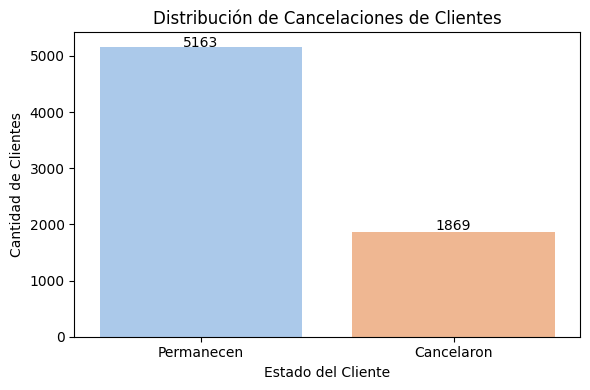

In [27]:
# Crear el gráfico
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Cancelacion', hue='Cancelacion', data=df, palette='pastel', legend=False)

# Título y etiquetas
plt.title('Distribución de Cancelaciones de Clientes')
plt.xticks([0, 1], ['Permanecen', 'Cancelaron'])
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad de Clientes')

# Mostrar cantidad encima de cada barra
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}',
                (p.get_x() + p.get_width() / 2., altura * 0.99),  # ← esto agrega un 2% de separación
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


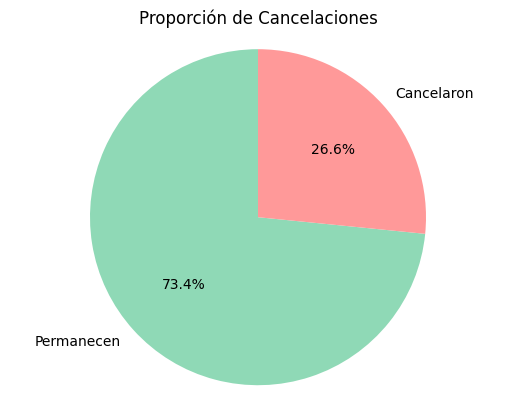

In [28]:
# Conteo de valores para el gráfico de pastel
conteo_cancelaciones = df['Cancelacion'].value_counts()

# Etiquetas personalizadas
etiquetas = ['Permanecen', 'Cancelaron']

# Gráfico de pastel
plt.pie(conteo_cancelaciones, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#8fd9b6','#ff9999'])
plt.title('Proporción de Cancelaciones')
plt.axis('equal')  # Para que sea circular
plt.show()


## **Recuento de evasión por variables categóricas**

In [29]:
#Primero renombro mis variables categoricas

df['Genero'] = df['Genero'].replace({
    'Male': 'Masculino',
    'Female': 'Femenino'
})

df['Tipo_Contrato'] = df['Tipo_Contrato'].replace({
    'Month-to-month': 'Mensual',
    'One year': 'Anual (1 año)',
    'Two year': 'Anual (2 años)'
})

df['Tipo_Contrato'] = df['Tipo_Contrato'].replace({
    'Month-to-month': 'Mensual',
    'One year': 'Anual (1 año)',
    'Two year': 'Anual (2 años)'
})
df['Metodo_Pago'] = df['Metodo_Pago'].replace({
    'Electronic check': 'Débito bancario automático',
    'Mailed check': 'Cheque por correo',
    'Bank transfer (automatic)': 'Transferencia bancaria',
    'Credit card (automatic)': 'Tarjeta de crédito'
})



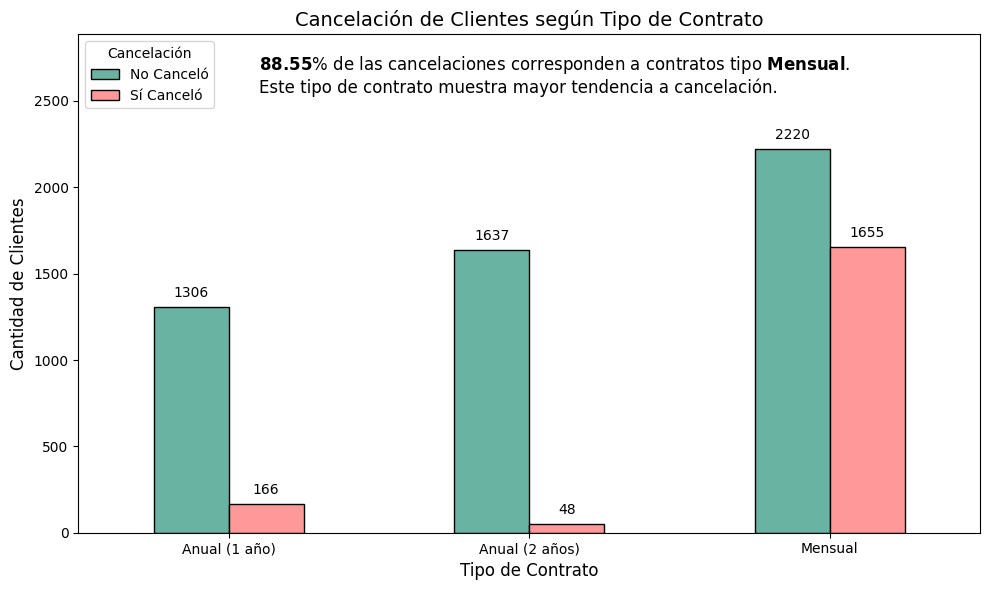

In [30]:
import matplotlib.pyplot as plt

# Agrupar datos por tipo de contrato y cancelación
data_contrato = df.groupby(['Tipo_Contrato', 'Cancelacion']).size().unstack(fill_value=0)

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))
data_contrato.plot(kind='bar', stacked=False, color=['#69b3a2', '#ff9999'], edgecolor='black', ax=ax)

# Etiquetas
ax.set_title('Cancelación de Clientes según Tipo de Contrato', fontsize=14)
ax.set_xlabel('Tipo de Contrato', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Etiquetas numéricas
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5)

# Leyenda
ax.legend(title='Cancelación', labels=['No Canceló', 'Sí Canceló'], loc='upper left')

# Calcular el porcentaje de cancelación por tipo de contrato
cancelaciones = data_contrato[1]
total_cancelaciones = cancelaciones.sum()
porcentajes = (cancelaciones / total_cancelaciones) * 100

# Obtener el contrato con mayor porcentaje de cancelación
contrato_top = porcentajes.idxmax()
porcentaje_top = porcentajes.max()

# Ajuste visual del eje Y
y_max = data_contrato.to_numpy().max()
ax.set_ylim(top=y_max * 1.3)

# Crear mensaje
mensaje = (
    f"$\\bf{{{porcentaje_top:.2f}}}$% de las cancelaciones corresponden a contratos tipo "
    f"$\\bf{{{contrato_top}}}$. \nEste tipo de contrato muestra mayor tendencia a cancelación."
)

# Agregar texto dentro del área del gráfico
ax.text(
    x=0.1,
    y=y_max * 1.25,
    s=mensaje,
    fontsize=12,
    color='black',
    ha='left',
    va='top'
)

plt.tight_layout()
plt.show()


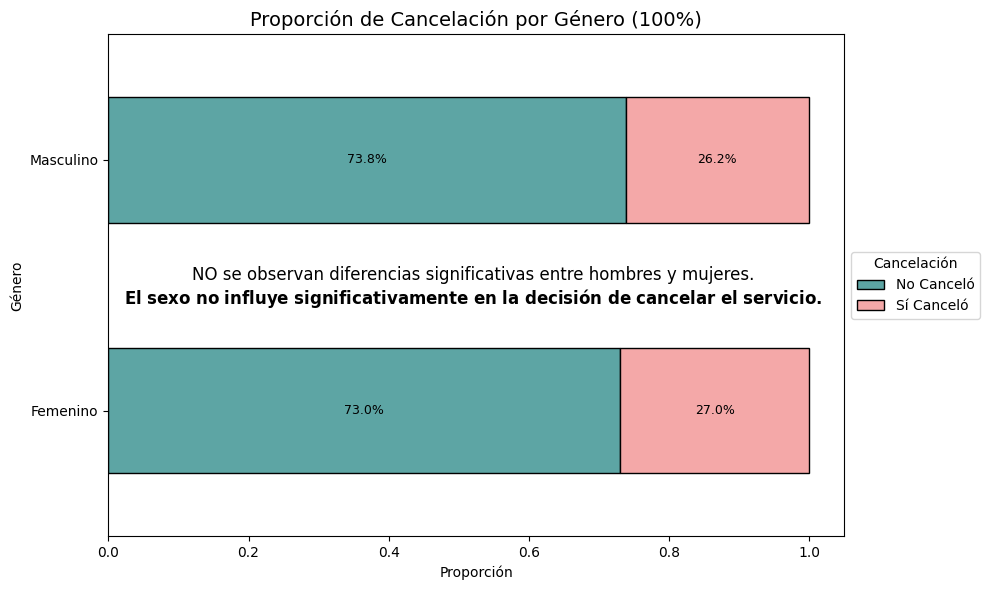

In [31]:
import matplotlib.pyplot as plt

# Asegurar columna de texto
df['Cancelacion_Texto'] = df['Cancelacion'].map({1: 'Sí Canceló', 0: 'No Canceló'})

# Agrupar y calcular proporciones
conteo_genero = df.groupby(['Genero', 'Cancelacion_Texto']).size().unstack(fill_value=0)
proporcion = conteo_genero.div(conteo_genero.sum(axis=1), axis=0)

# Colores
colores = ['#5DA5A4', '#F4A8A8']

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))
proporcion.plot(kind='barh', stacked=True, color=colores, edgecolor='black', ax=ax)

# Título y etiquetas
ax.set_title('Proporción de Cancelación por Género (100%)', fontsize=14)
ax.set_xlabel('Proporción')
ax.set_ylabel('Género')

# Etiquetas dentro de las barras
for cont in ax.containers:
    ax.bar_label(cont, labels=[f'{v:.1%}' for v in cont.datavalues], label_type='center', fontsize=9, color='black')

# Leyenda
ax.legend(title='Cancelación', loc='center left', bbox_to_anchor=(1, 0.5))

# === TEXTO descriptivo dentro del área del gráfico
# Puedes ajustar x e y a gusto
texto = (
    "NO se observan diferencias significativas entre hombres y mujeres.\n"
    "$\\bf{El\ sexo\ no\ influye\ significativamente\ en\ la\ decisión\ de\ cancelar\ el\ servicio.}$"
)

ax.text(
    x=0.52,
    y=0.4,
    s=texto,
    fontsize=12,
    color='black',
    ha='center',
    va='bottom'
)

plt.tight_layout()
plt.show()



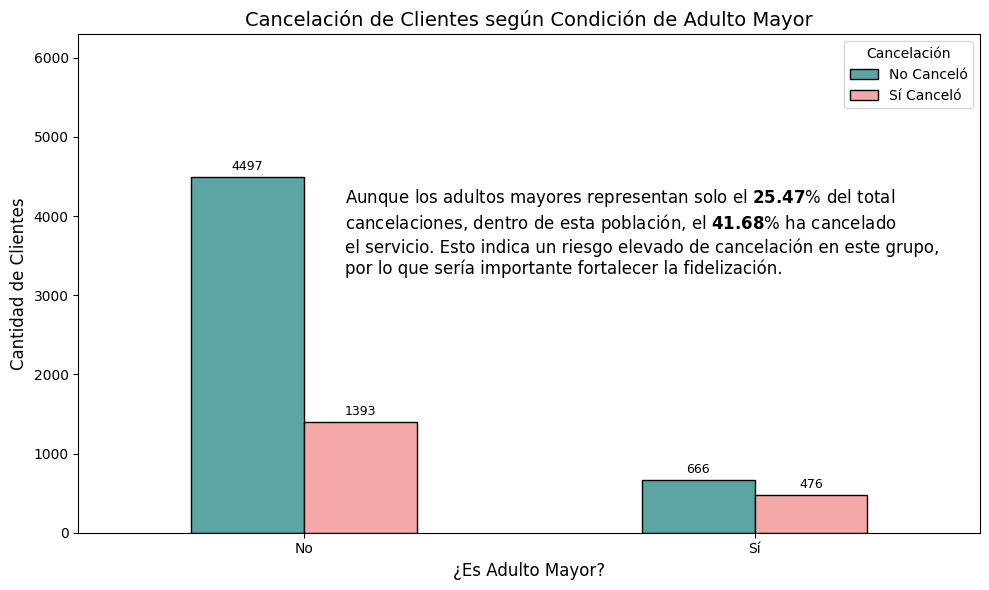

In [32]:
import matplotlib.pyplot as plt

# Crear columnas legibles
df['Adulto_Mayor_Texto'] = df['Adulto_Mayor'].map({1: 'Sí', 0: 'No'})
df['Cancelacion_Texto'] = df['Cancelacion'].map({1: 'Sí Canceló', 0: 'No Canceló'})

# Agrupar los datos
conteo_adulto = df.groupby(['Adulto_Mayor_Texto', 'Cancelacion_Texto']).size().unstack(fill_value=0)

# Colores
colores = ['#5DA5A4', '#F4A8A8']

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))
conteo_adulto.plot(kind='bar', stacked=False, color=colores, edgecolor='black', ax=ax)

# Estilo
ax.set_title('Cancelación de Clientes según Condición de Adulto Mayor', fontsize=14)
ax.set_xlabel('¿Es Adulto Mayor?', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Etiquetas numéricas
for cont in ax.containers:
    ax.bar_label(cont, label_type='edge', padding=3, fontsize=9)

# Leyenda
ax.legend(title='Cancelación', loc='upper right')

# Análisis cruzado
total_cancelaciones = df[df['Cancelacion'] == 1].shape[0]
cancelaciones_mayores = conteo_adulto.loc['Sí', 'Sí Canceló']
total_mayores = conteo_adulto.loc['Sí'].sum()

porc_sobre_total = (cancelaciones_mayores / total_cancelaciones) * 100
porc_dentro_mayores = (cancelaciones_mayores / total_mayores) * 100

# Mensaje
mensaje = (
    f"Aunque los adultos mayores representan solo el $\\bf{{{porc_sobre_total:.2f}}}$% del total\n"
    f"cancelaciones, dentro de esta población, el $\\bf{{{porc_dentro_mayores:.2f}}}$% ha cancelado\n"
    f"el servicio. Esto indica un riesgo elevado de cancelación en este grupo,\n"
    f"por lo que sería importante fortalecer la fidelización.\n"
)

# Ajuste del eje Y
y_max = conteo_adulto.to_numpy().max()
ax.set_ylim(top=y_max * 1.4)

# Agregar texto arriba del gráfico
fig.text(
    0.35, 0.5,
    mensaje,
    fontsize=12,
    color='black',
    ha='left'
)

plt.tight_layout()
plt.show()



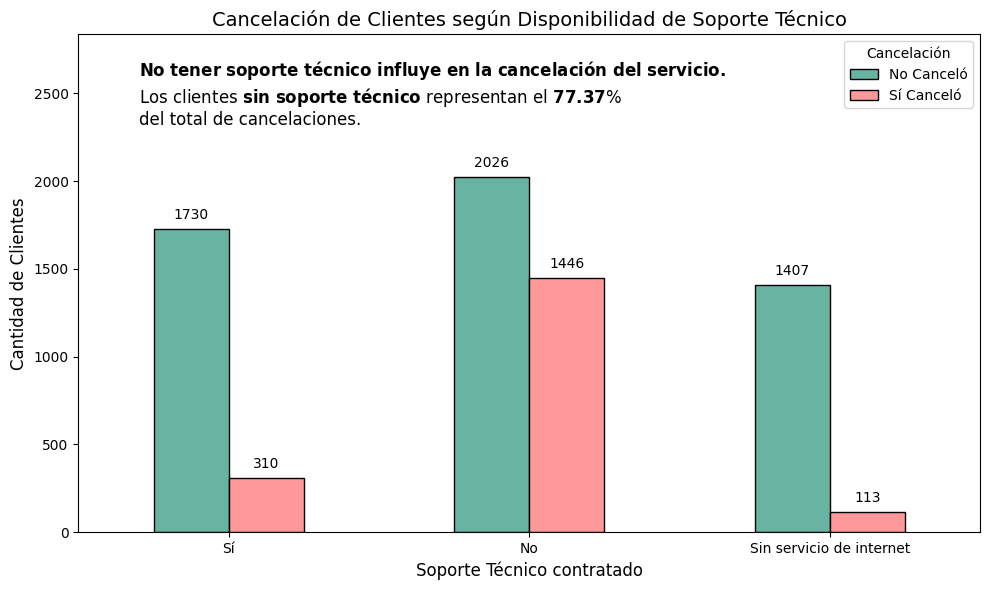

In [33]:
import matplotlib.pyplot as plt

# Crear columna traducida
def traducir_soporte(x):
    if x == 1:
        return 'Sí'
    elif x == 0:
        return 'No'
    else:
        return 'Sin servicio de internet'

df['Soporte_Tecnico_Texto'] = df['Soporte_Tecnico'].apply(traducir_soporte)

# Agrupar por soporte técnico y cancelación
data_soporte = df.groupby(['Soporte_Tecnico_Texto', 'Cancelacion']).size().unstack(fill_value=0)

# Orden lógico
orden = ['Sí', 'No', 'Sin servicio de internet']
data_soporte = data_soporte.reindex(orden)

# Crear gráfico
fig, ax = plt.subplots(figsize=(10,6))
data_soporte.plot(kind='bar', stacked=False, color=['#69b3a2', '#ff9999'], edgecolor='black', ax=ax)

# Títulos y etiquetas
ax.set_title('Cancelación de Clientes según Disponibilidad de Soporte Técnico', fontsize=14)
ax.set_xlabel('Soporte Técnico contratado', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Mostrar valores sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=5)

# Leyenda
ax.legend(title='Cancelación', labels=['No Canceló', 'Sí Canceló'], loc='upper right')


# Total de cancelaciones en todos los grupos
total_cancelaciones = df[df['Cancelacion'] == 1].shape[0]

# Cancelaciones en personas sin soporte técnico
cancelaciones_sin_soporte = data_soporte.loc['No', 1]
porcentaje_sin_soporte = (cancelaciones_sin_soporte / total_cancelaciones) * 100

# Crear mensaje
texto = (
    "$\\bf{No\ tener\ soporte\ técnico\ influye\ en\ la\ cancelación\ del\ servicio.}$\n"
    f"Los clientes $\\bf{{sin\ soporte\ técnico}}$ representan el $\\bf{{{porcentaje_sin_soporte:.2f}}}$%\n"
    f"del total de cancelaciones.\n"
)

# Espacio visual
y_max = data_soporte.to_numpy().max()
ax.set_ylim(top=y_max * 1.4)

# Agregar texto dentro del gráfico (sobre grupo 'No')
ax.text(
    x=-0.3,
    y=y_max * 1.33,
    s=texto,
    fontsize=12,
    color='black',
    ha='left',
    va='top',
)


plt.tight_layout()
plt.show()


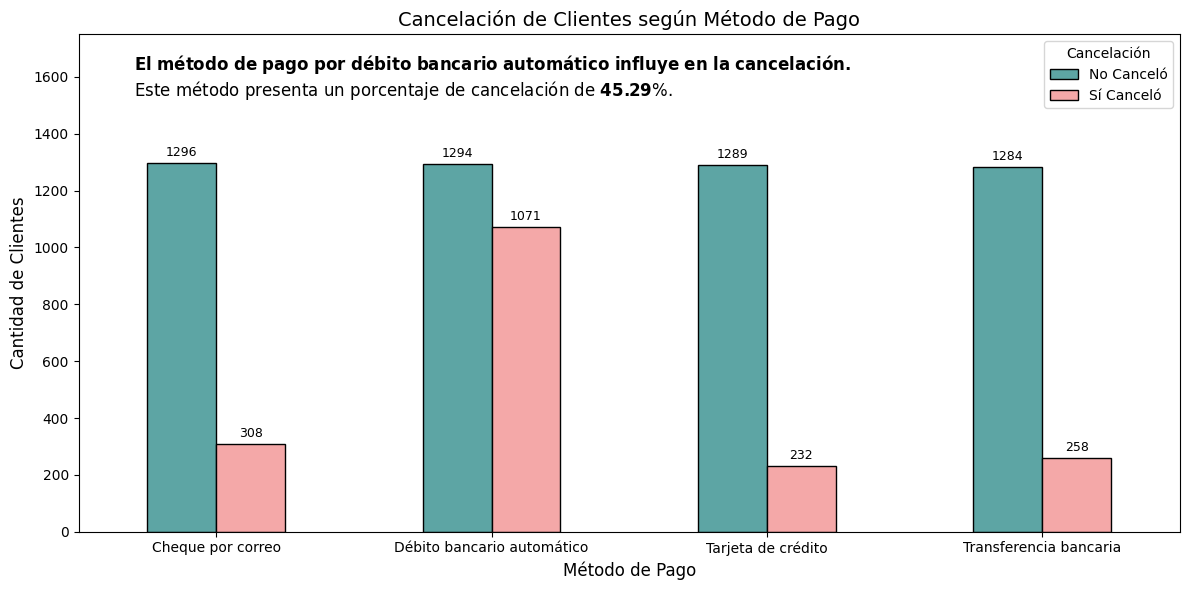

In [34]:
import matplotlib.pyplot as plt

# Asegurar columna de texto
df['Cancelacion_Texto'] = df['Cancelacion'].map({1: 'Sí Canceló', 0: 'No Canceló'})

# Agrupar por método de pago
conteo_pago = df.groupby(['Metodo_Pago', 'Cancelacion_Texto']).size().unstack(fill_value=0)

# Colores
colores = ['#5DA5A4', '#F4A8A8']

# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 6))
conteo_pago.plot(kind='bar', stacked=False, color=colores, edgecolor='black', ax=ax)

# Estilo
ax.set_title('Cancelación de Clientes según Método de Pago', fontsize=14)
ax.set_xlabel('Método de Pago', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(rotation=0, ha='center')

# Etiquetas numéricas
for cont in ax.containers:
    ax.bar_label(cont, label_type='edge', padding=3, fontsize=9)

# Leyenda
ax.legend(title='Cancelación', loc='upper right')

# === Cálculo del porcentaje de cancelaciones con débito automático
metodo_objetivo = 'Débito bancario automático'

if metodo_objetivo in conteo_pago.index:
    total_debito = conteo_pago.loc[metodo_objetivo].sum()
    cancelaciones_debito = conteo_pago.loc[metodo_objetivo, 'Sí Canceló']
    porcentaje_cancelacion = (cancelaciones_debito / total_debito) * 100
else:
    porcentaje_cancelacion = 0

# === Texto con análisis
texto = (
    "$\\bf{El\ método\ de\ pago\ por\ débito\ bancario\ automático\ influye\ en\ la\ cancelación.}$\n"
    f"Este método presenta un porcentaje de cancelación de "
    f"$\\bf{{{porcentaje_cancelacion:.2f}}}$%.\n"

)

# Espacio visual
y_max = conteo_pago.to_numpy().max()
ax.set_ylim(top=y_max * 1.35)

# Insertar texto en el gráfico

ax.text(
    x=-0.3,  # Ajusta según ubicación visual deseada
    y=y_max * 1.3,
    s=texto,
    fontsize=12,
    color='black',
    ha='left',
    va='top',
)

plt.tight_layout()
plt.show()


## **Conteo de evasión por variables numéricas**

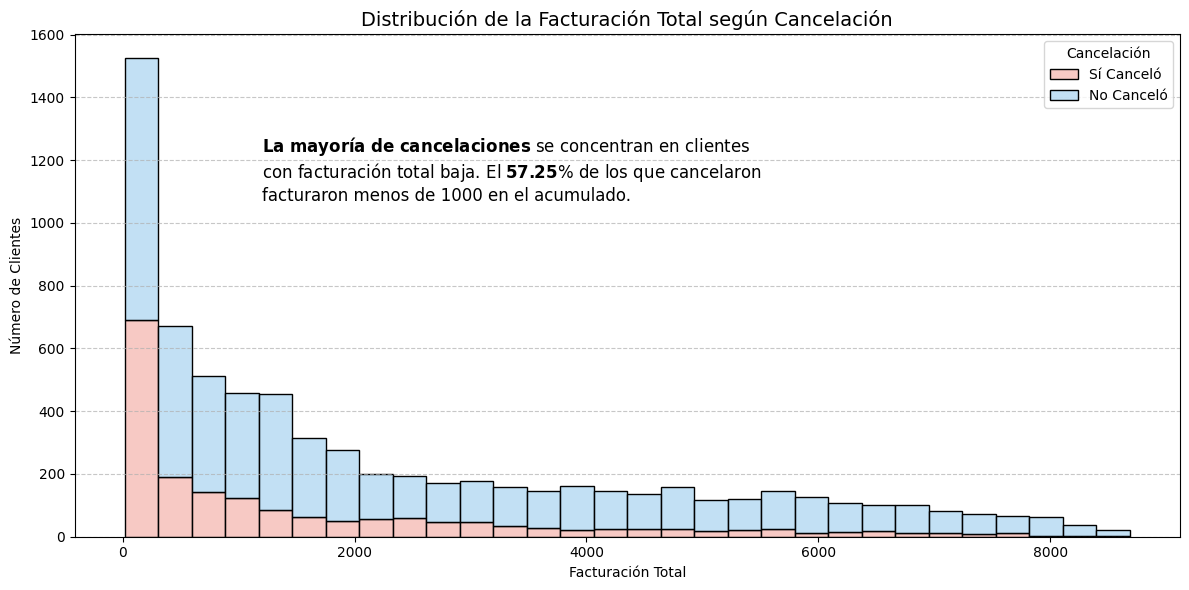

In [35]:
# calcular porcentaje de cancelaciones en clientes con facturación baja (ej: < 1000)
limite = 1000
cancelaciones_totales = df[df['Cancelacion'] == 1].shape[0]
cancelaciones_bajas = df[(df['Cancelacion'] == 1) & (df['Facturacion_Total'] < limite)].shape[0]
porcentaje_bajas = (cancelaciones_bajas / cancelaciones_totales) * 100

# crear gráfico con texto incluido
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x='Facturacion_Total',
    hue='Cancelacion',
    palette={1.0: '#F5B7B1', 0.0: '#AED6F1'},
    multiple='stack',
    edgecolor='black',
    bins=30
)

plt.title('Distribución de la Facturación Total según Cancelación', fontsize=14)
plt.xlabel('Facturación Total')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelación', labels=['Sí Canceló', 'No Canceló'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# agregar texto explicativo dentro del gráfico
mensaje = (
    "$\\bf{La\ mayoría\ de\ cancelaciones}$ se concentran en clientes\n"
    f"con facturación total baja. El $\\bf{{{porcentaje_bajas:.2f}}}$% de los que cancelaron\n"
    f"facturaron menos de {limite} en el acumulado."
)

plt.text(
    x=limite * 1.2,
    y=plt.ylim()[1] * 0.8,
    s=mensaje,
    fontsize=12,
    ha='left',
    va='top',
    color='black',

)

plt.tight_layout()
plt.show()


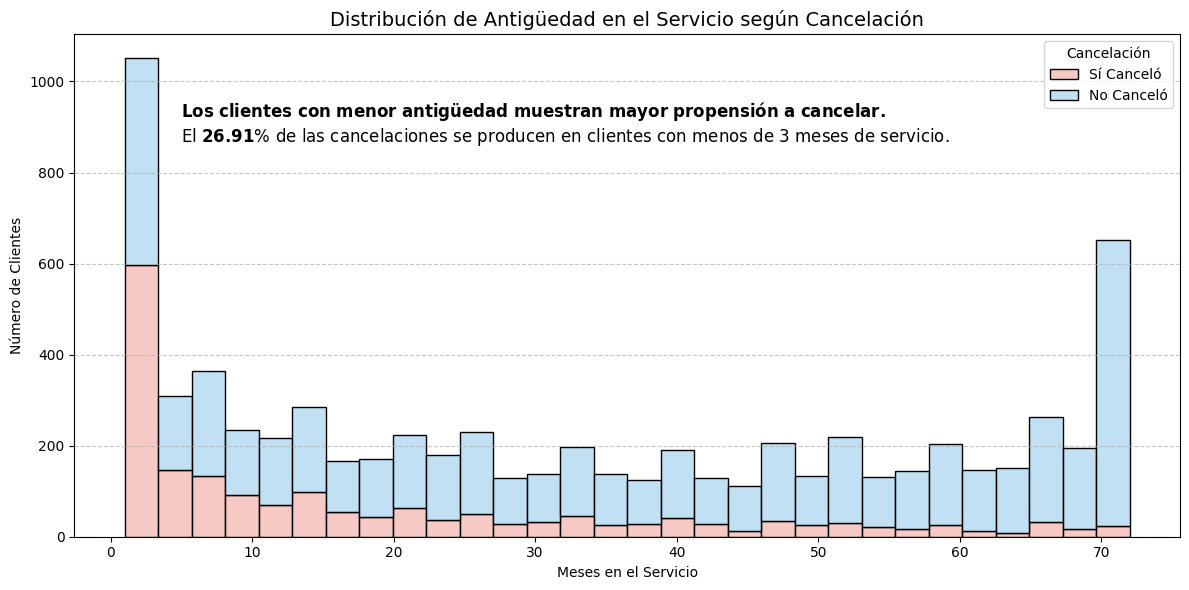

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el porcentaje de cancelaciones en los primeros 3 meses
cancelados = df[df['Cancelacion'] == 1]
total_cancelaciones = cancelados.shape[0]
cancelaciones_menor_3m = cancelados[cancelados['Antiguedad_Meses'] < 3].shape[0]

porcentaje_3m = (cancelaciones_menor_3m / total_cancelaciones) * 100

# Crear el gráfico
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x='Antiguedad_Meses',
    hue='Cancelacion',
    palette={1.0: '#F5B7B1', 0.0: '#AED6F1'},
    multiple='stack',
    edgecolor='black',
    bins=30
)

plt.title('Distribución de Antigüedad en el Servicio según Cancelación', fontsize=14)
plt.xlabel('Meses en el Servicio')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelación', labels=['Sí Canceló', 'No Canceló'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar texto explicativo dentro del gráfico
texto = (
    "$\\bf{Los\ clientes\ con\ menor\ antigüedad\ muestran\ mayor\ propensión\ a\ cancelar.}$\n"
    f"El $\\bf{{{porcentaje_3m:.2f}}}$% de las cancelaciones se producen en clientes con menos de 3 meses de servicio."

)

plt.text(
    x=5,
    y=plt.ylim()[1] * 0.87,
    s=texto,
    fontsize=12,
    color='black',
    ha='left',
    va='top',

)

plt.tight_layout()
plt.show()


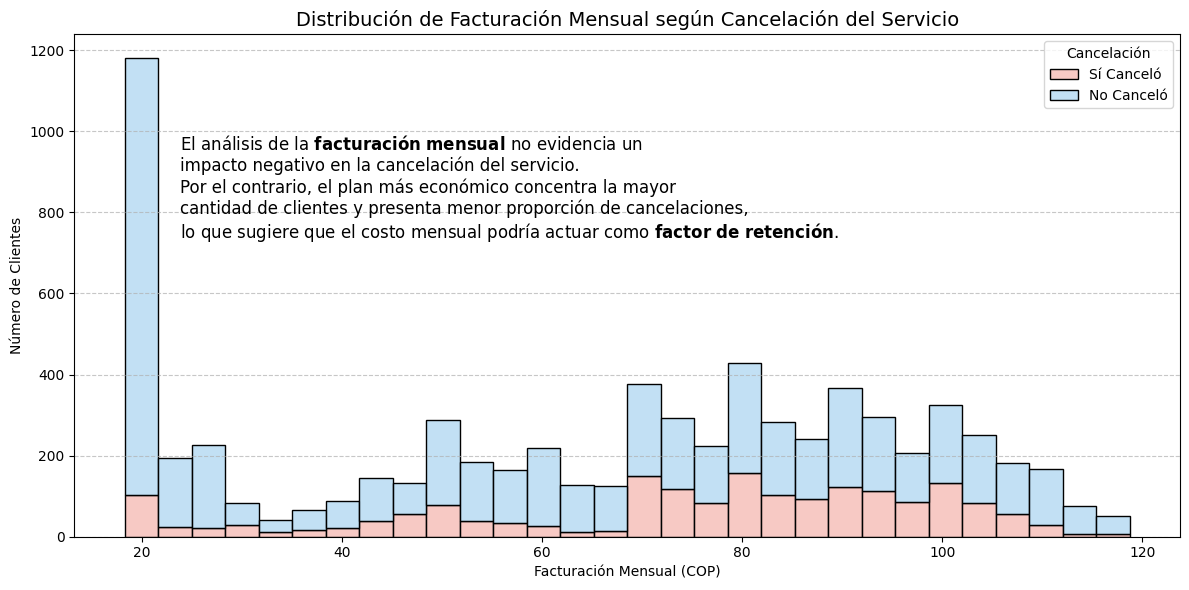

In [37]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x='Facturacion_Mensual',
    hue='Cancelacion',
    palette={1.0: '#F5B7B1', 0.0: '#AED6F1'},
    multiple='stack',
    edgecolor='black',
    bins=30
)

plt.title('Distribución de Facturación Mensual según Cancelación del Servicio', fontsize=14)
plt.xlabel('Facturación Mensual (COP)')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelación', labels=['Sí Canceló', 'No Canceló'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# === Texto interpretativo dentro del gráfico ===
mensaje = (
    "El análisis de la $\\bf{facturación\ mensual}$ no evidencia un\n"
    "impacto negativo en la cancelación del servicio.\n"
    "Por el contrario, el plan más económico concentra la mayor\n"
    "cantidad de clientes y presenta menor proporción de cancelaciones,\n"
    "lo que sugiere que el costo mensual podría actuar como $\\bf{factor\ de\ retención}$."
)

plt.text(
    x=df['Facturacion_Mensual'].max()*0.2,   # Posición horizontal
    y=plt.ylim()[1]*0.8,                      # Posición vertical
    s=mensaje,
    fontsize=12,
    ha='left',
    va='top',
    color='black',

)

plt.tight_layout()
plt.show()



# **Conclusiones e Insights**
**Principales hallazgos:**
- Clientes con contratos mensuales presentan una tasa de cancelación de más del 88%.
-Los clientes con menor antigüedad muestran mayor propensión a cancelar.
- La ausencia y/o baja calidad de soporte técnico incrementa significativament la probabilidad de cancelación, más del 77% de los clientes que cancelaron no tienen soporte técnico.
-El método de pago por débito bancario automático influye en la cancelación, más del 45% de las cancelaciones se ven relacionadas a este medio de pago.
-Aunque los adultos mayores representan el 25% de las cancelaciones totales ,dentro de esta población existe un riesgo de cancelacion alto de casi el 50% .
- La facturación mensual no evidencia impacto negativo en la cancelacion del servicio, por el contrario , el plan mas economico concentra la mayor cantidad de clientes  y presenta menor proporción de cancelaciones, lo que sugiere que el costo mensual podria actuar como factor de retención.



# **Recomendaciones Estratégicas**

- Incentivar migración de contratos mensuales a contratos de mayor duración con descuentos y beneficios.  
- Implementar programa de bienvenida y seguimiento para clientes nuevos durante los primeros 3 meses.  
- Mejorar calidad y cobertura del soporte técnico, promoviendo su contratación con ofertas.  
- Revisar procesos del débito automático, si se hace nesario seguir incentivando o no este medio de pago.
- Ofrecer atención preferencial y beneficios especiales para adultos mayores.  
- Mantener y promocionar planes económicos como estrategia de retención.  
